# Exercise 2.5 - Visual Applications of Machine Learning (Part 1)

This script contains code for Exercise 2.5 part 1 - Handwriting Recognition. The structure is:

1. Importing Libraries and Data
2. Check and Reshape Data
3. Constructing and Training the Model
4. Testing the Model
5. Loading Preprocessing Handwritten Images for Model Prediction (Attempt 1)
6. Running the Model on Handwritten Images (Attempt 1)
7. Loading Preprocessing Handwritten Images for Model Prediction (Attempt 2)
8. Running the Model on Handwritten Images (Attempt 1)

## 1. Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import operator
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from numpy import unique
from numpy import reshape
from keras.models import Sequential
from keras.layers import Conv1D, Conv2D, Dense, BatchNormalization, Flatten, MaxPooling2D, Activation, Dropout
from keras.utils import to_categorical
from keras.datasets import mnist
from numpy import argmax
from PIL import Image
from numpy import asarray

In [2]:
tf.random.set_seed(42)

In [3]:
# Load images of handwriten numbers from MNIST (Modified National Institute of Standards and Technology) module
hand = mnist.load_data()

## 2. Check and Reshape Data

In [4]:
# Check the data (hand[0] contains the training data and corresponding labels)
hand[0]

(array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [5]:
# Unpack the data loaded from the MNIST dataset
(X_train, y_train), (X_test, y_test) = hand

In [6]:
np.set_printoptions(edgeitems=3)
np.core.arrayprint._line_width = 180000

In [7]:
# Shows the 2D Numpy array for the first image in the dataset - organised in 28 rows of 28 values (Like the 28x28 pixels of the image)
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [9]:
# Shows the labels for the full training dataset (not one-hot encoded)
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

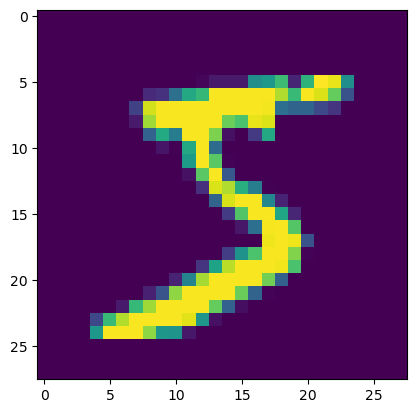

In [10]:
plt.imshow(X_train[0])

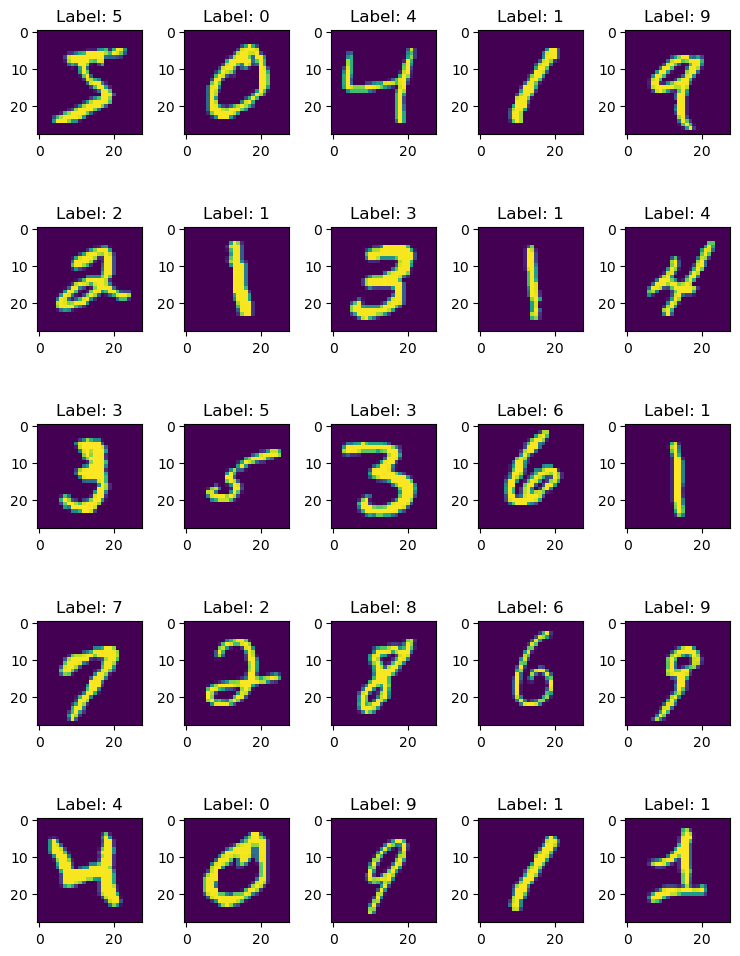

In [11]:
# The following shows the first 25 images and corresponding labels of the training dataset (good way to quickly check the data)
num = 25
images = X_train[:num]
labels = y_train[:num]

num_row = 5
num_col = 5
# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

In [12]:
# Preprocess input data (Reshape)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1) # Final 1 ensures the algorithm treats each array as its own set of information
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [13]:
# Change data to float values to ensure it can be dividied
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [14]:
# Normalise the data around 1 (divide by 255 because the pixels have a value range of 255)
X_train /= 255
X_test /= 255

In [15]:
# 6. Preprocess class labels
Y_train = to_categorical(y_train, num_classes=10) # num_classes equals 10 since there are 10 possible values (0-9)
Y_test = to_categorical(y_test, num_classes=10)

In [16]:
Y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]])

In [17]:
# Check the one-hot encoding matches with the previous 25 images printed
for photo in range(25):
    one_hot = (Y_train[photo]).astype(np.int32)
    print("Photo ", photo, ": ", " in one-hot representation: ", one_hot)

Photo  0 :   in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
Photo  1 :   in one-hot representation:  [1 0 0 0 0 0 0 0 0 0]
Photo  2 :   in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
Photo  3 :   in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
Photo  4 :   in one-hot representation:  [0 0 0 0 0 0 0 0 0 1]
Photo  5 :   in one-hot representation:  [0 0 1 0 0 0 0 0 0 0]
Photo  6 :   in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
Photo  7 :   in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
Photo  8 :   in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
Photo  9 :   in one-hot representation:  [0 0 0 0 1 0 0 0 0 0]
Photo  10 :   in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
Photo  11 :   in one-hot representation:  [0 0 0 0 0 1 0 0 0 0]
Photo  12 :   in one-hot representation:  [0 0 0 1 0 0 0 0 0 0]
Photo  13 :   in one-hot representation:  [0 0 0 0 0 0 1 0 0 0]
Photo  14 :   in one-hot representation:  [0 1 0 0 0 0 0 0 0 0]
Photo  15 :   in one-hot representation:  [0 0 0 0

## 3. Constructing and Training Model

In [18]:
# Construct CNN model
epochs = 30
batch_size = 16
n_hidden = 32

# timesteps = len(X_train[0])
# input_dim = len(X_train[0][0])
# n_classes = _count_classes(Y_train)

# Define model architecture
model = Sequential()
 
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
 
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
 
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\kyles\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Fit model on training data
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.8675 - loss: 0.4173
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9731 - loss: 0.0901
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9793 - loss: 0.0665
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9823 - loss: 0.0586
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9867 - loss: 0.0448
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9870 - loss: 0.0434
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9885 - loss: 0.0380
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9900 - loss: 0.0318
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9906 - loss: 0.0308
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9909 - loss: 0.0292


## 4. Testing the Model

In [20]:
# Evaluate model on test data
score = model.evaluate(X_test, Y_test, verbose=2)

313/313 - 1s - 5ms/step - accuracy: 0.9913 - loss: 0.0331


In [21]:
# Predict first 4 images in the test set
model.predict(X_test[:4])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


array([[2.1848738e-17, 1.9403633e-13, 5.3138209e-11, 9.7179764e-11,
        1.7878405e-16, 2.8113258e-17, 8.0046308e-24, 1.0000000e+00,
        1.3656869e-14, 2.8198192e-11],
       [1.3489334e-12, 1.9100781e-08, 1.0000000e+00, 2.5822828e-14,
        4.6643050e-17, 1.0121012e-21, 1.3572318e-14, 5.3609960e-15,
        1.1299279e-16, 8.3710008e-18],
       [2.6241302e-09, 9.9999809e-01, 1.3174875e-07, 9.3256591e-10,
        6.1387101e-07, 1.4788034e-08, 9.9717937e-08, 9.0866342e-07,
        7.6500456e-08, 3.4857447e-08],
       [9.9999774e-01, 3.4073886e-11, 1.4166129e-10, 2.4812449e-10,
        7.5127232e-10, 4.6713828e-09, 2.3057009e-06, 1.9834035e-11,
        1.7151002e-09, 9.4147179e-09]], dtype=float32)

In [22]:
sumarray = np.sum(model.predict(X_test[:4]), axis=1)
sumarray

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


array([1.        , 1.        , 0.99999994, 1.        ], dtype=float32)

In [23]:
# Actual results for first 4 images in test set
y_test[:4]

array([7, 2, 1, 0], dtype=uint8)

In [24]:
# Confusion Matrix
test_predictions = model.predict(X_test)
cm = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))
print(cm)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[[ 972    0    1    1    0    1    3    0    1    1]
 [   0 1132    1    0    0    1    0    1    0    0]
 [   0    0 1025    3    0    0    0    4    0    0]
 [   0    0    1 1004    0    4    0    0    1    0]
 [   0    0    1    0  971    0    1    0    1    8]
 [   1    0    1    4    0  884    2    0    0    0]
 [   3    4    1    0    1    5  944    0    0    0]
 [   0    1    3    0    0    0    0 1022    1    1]
 [   2    0    2    5    0    2    0    2  961    0]
 [   0    0    1    0    2    6    0    1    1  998]]


## 5. Loading and Preprocessing Handwritten Images for Model Prediction (Attempt 1)

In [25]:
path = r'C:\Users\kyles\CareerFoundary\Machine Learning\Achievement 2\06 Extra\Handwriting Images' # YOUR PATH HERE

In [26]:
# Define the list of numbers for the labels
labels = list(range(10))

# Initialise lists to stire the image data and labels
images = []
image_labels = []

# Loop through all numbers and load corresponding images:
for label in labels:
    # Open the image
    img = Image.open(os.path.join(path, f'{label} original.png'))

    # Convert image to grayscale
    img = img.convert('L') # 'L' mode is for grayscale

    # Invert grayscale image to create a negative
    img = Image.eval(img, lambda x: 255 - x)

    # Resize the image to 28x28
    newsize = (28, 28)
    img_resized = img.resize(newsize)

    # Convert image to Numpy array
    img_array = np.asarray(img_resized)

    # Normalize the image data to the range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to match the CNN input format: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    # Append the processed image and label to the respective lists
    images.append(img_array)
    image_labels.append(label)

# Convert the lists to numpy arrays
images = np.array(images)
image_labels = np.array(image_labels)

# Check the shapes of the images and labels
print("Images shape:", images.shape)
print("Labels shape:", image_labels.shape)  

Images shape: (10, 28, 28, 1)
Labels shape: (10,)


Images shape should be (10, 28, 28, 1) for 10 images, each with a size of 28x28 pixels, with 1 channel (grayscale)

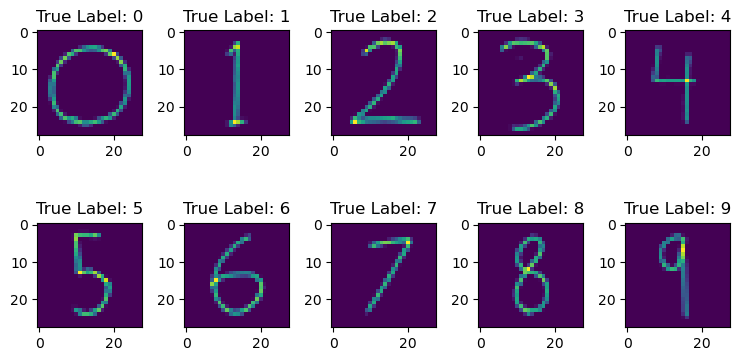

In [27]:
# load images for a quick check
num = 10
images = images[:num]
labels = image_labels[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('True Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## 6. Running the Model on Handwritten Images (Attempt 1)

In [28]:
# Run the model's predictions on the handwritten data
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


In [29]:
# Get the predicted class (the index of the maximum value in the output array)
predicted_labels = np.argmax(predictions, axis=1)

In [30]:
print('image_labels shape:', image_labels.shape)
print('predicted_labels shape:', predicted_labels.shape)

image_labels shape: (10,)
predicted_labels shape: (10,)


In [31]:
# Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(image_labels, predicted_labels)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 40.00%


In [32]:
# Display the predicted and true labels

for i, (pred, actual) in enumerate(zip(predicted_labels, image_labels)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 3, Actual = 0
Image 1: Predicted = 1, Actual = 1
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 3, Actual = 3
Image 4: Predicted = 7, Actual = 4
Image 5: Predicted = 3, Actual = 5
Image 6: Predicted = 5, Actual = 6
Image 7: Predicted = 7, Actual = 7
Image 8: Predicted = 3, Actual = 8
Image 9: Predicted = 1, Actual = 9


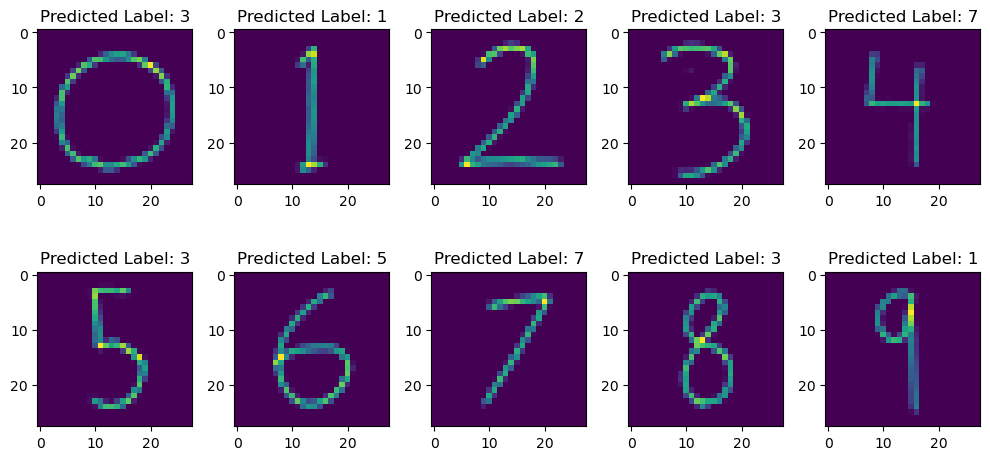

In [33]:
# Display predicted labels next to images
num = 10
images = images[:num]
labels = predicted_labels[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2.5*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Predicted Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

**Why is the model terrible at predicting the true labels of the written numbers?**

I believe the model is struggling because the lines making up the numbers in the training data are all much thicker. This let the model tell more easily where the edges of each number were. My numbers were written very largely with a pen on some blank paper. Looking at the images above, this seems to have made my numbers' edges much thinner (which is made even worse by the resizing - as all the lines aren't as bright in the negative images)

The above images were actually scans. i did this because photographs managed to capture light from the bottom left corner. I believe this fooled the model even worse as it came back with a 0% accuracy.

Perhaps rewriting the images smaller or with a thicker marker will work better

## 7. Loading and Preprocessing Handwritten Images for Model Prediction (Attempt 2)

In [34]:
# Define the list of numbers for the labels
labels = list(range(10))

# Initialise lists to stire the image data and labels
images_new = []
image_labels_new = []

# Loop through all numbers and load corresponding images:
for label in labels:
    # Open the image
    img = Image.open(os.path.join(path, f'{label} thicker.png'))

    # Convert image to grayscale
    img = img.convert('L') # 'L' mode is for grayscale

    # Invert grayscale image to create a negative
    img = Image.eval(img, lambda x: 255 - x)

    # Resize the image to 28x28
    newsize = (28, 28)
    img_resized = img.resize(newsize)

    # Convert image to Numpy array
    img_array = np.asarray(img_resized)

    # Normalize the image data to the range [0, 1]
    img_array = img_array / 255.0
    
    # Reshape to match the CNN input format: (28, 28, 1)
    img_array = img_array.reshape(28, 28, 1)

    # Append the processed image and label to the respective lists
    images_new.append(img_array)
    image_labels_new.append(label)

# Convert the lists to numpy arrays
images_new = np.array(images_new)
image_labels_new = np.array(image_labels_new)

# Check the shapes of the images and labels
print("Images shape:", images_new.shape)
print("Labels shape:", image_labels_new.shape)  

Images shape: (10, 28, 28, 1)
Labels shape: (10,)


Images shape should be (10, 28, 28, 1) for 10 images, each with a size of 28x28 pixels, with 1 channel (grayscale)

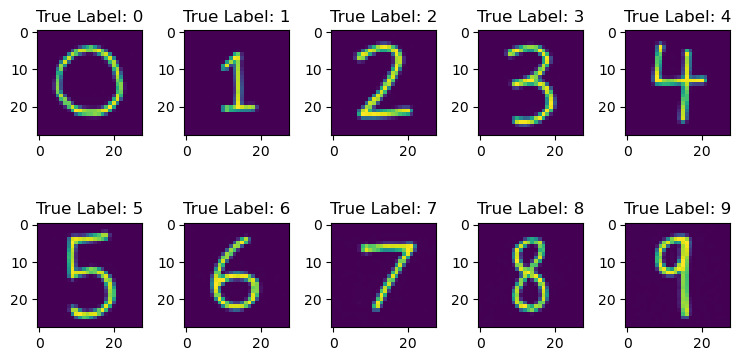

In [35]:
# load images for a quick check
num = 10
images = images_new[:num]
labels = image_labels_new[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('True Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()

## 8. Running the Model on Handwritten Images (Attempt 2)

In [36]:
# Run the model's predictions on the handwritten data
predictions = model.predict(images_new)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [37]:
# Get the predicted class (the index of the maximum value in the output array)
predicted_labels_new = np.argmax(predictions, axis=1)

In [38]:
print('image_labels shape:', image_labels_new.shape)
print('predicted_labels shape:', predicted_labels_new.shape)

image_labels shape: (10,)
predicted_labels shape: (10,)


In [39]:
# Calculate accuracy

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(image_labels_new, predicted_labels_new)
print(f"Model accuracy on handwritten data: {accuracy * 100:.2f}%")

Model accuracy on handwritten data: 100.00%


In [40]:
# Display the predicted and true labels

for i, (pred, actual) in enumerate(zip(predicted_labels_new, image_labels_new)):
    print(f"Image {i}: Predicted = {pred}, Actual = {actual}")

Image 0: Predicted = 0, Actual = 0
Image 1: Predicted = 1, Actual = 1
Image 2: Predicted = 2, Actual = 2
Image 3: Predicted = 3, Actual = 3
Image 4: Predicted = 4, Actual = 4
Image 5: Predicted = 5, Actual = 5
Image 6: Predicted = 6, Actual = 6
Image 7: Predicted = 7, Actual = 7
Image 8: Predicted = 8, Actual = 8
Image 9: Predicted = 9, Actual = 9


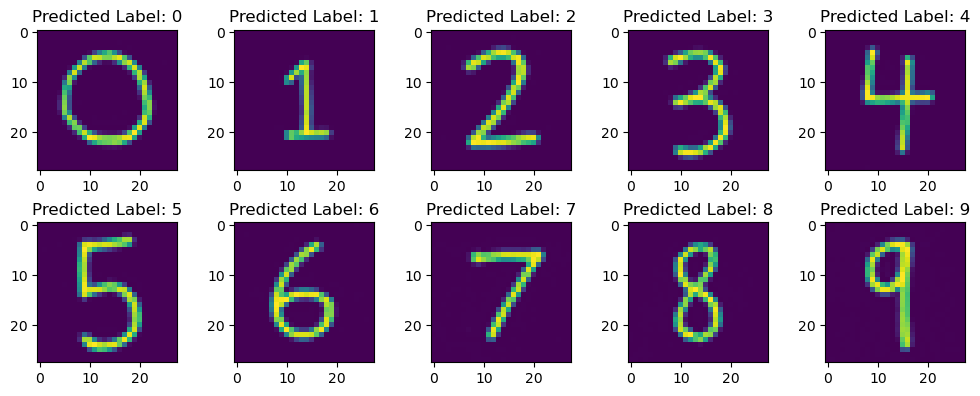

In [41]:
# Display predicted labels next to images
num = 10
images = images_new[:num]
labels = predicted_labels_new[:num]

num_row = 2
num_col = 5

# plot images
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(images[i])#, cmap='gray')
    ax.set_title('Predicted Label: {}'.format(labels[i]))
plt.tight_layout()
plt.show()